all imports

In [69]:
try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sb
    print('seaborn was not installed, installed and imported') 
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
# sklearn
try:
    from sklearn.datasets import load_breast_cancer
    from sklearn.model_selection import train_test_split
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.pipeline import Pipeline
    from sklearn.svm import SVC
    from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
    from sklearn.metrics import confusion_matrix
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.preprocessing import KBinsDiscretizer
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.datasets import load_breast_cancer
    from sklearn.model_selection import train_test_split
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.pipeline import Pipeline
    from sklearn.svm import SVC
    from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
    from sklearn.metrics import confusion_matrix
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.preprocessing import KBinsDiscretizer
    print('sklearn was not installed, installed and imported')  


seaborn already installed, only imported
PyPlot already installed, only imported
NumPy already installed, only imported
sklearn already installed, only imported


Load dataset

In [70]:
data = load_breast_cancer()
X, y = data.data, data.target

labels = data.target_names
k = len(labels)

In [71]:
print(data.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

PreProcess data

In [72]:
# Define the transformers for numeric features
numeric_features = [i for i, dtype in enumerate(data.feature_names)]
numeric_transformer = Pipeline(
        steps=[("scaler",StandardScaler()),('binning', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')),
])

In [73]:
# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features)])

Create new features

In [74]:
def create_new_features(X):
    X.shape
    mean_radius_idx = 0  # the index of 'mean radius'
    mean_diameter = X[:, mean_radius_idx] * 2
    X = np.column_stack((X, mean_diameter))
    mean_symmetry_idx = 8
    worst_symmetry_idx = 28
    symmetry_difference = X[:, worst_symmetry_idx] - X[:,mean_symmetry_idx]
    X = np.column_stack((X, symmetry_difference))
    return X

make a prediction

In [75]:
print(labels)

['malignant' 'benign']


In [76]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a pipeline with a scaler and an SVM classifier
pipeline = Pipeline([
    ('feature_engineering', FunctionTransformer(create_new_features)),
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test[:1])
print(y_pred)

[1]


Top 10 features according to 3 different measures of predictiveness

In [77]:
# Define a function to create the pipeline with feature selection
def create_feature_selection_pipeline(selector):
    return Pipeline([
        ('feature_selection', selector),
        ('classifier', SVC())
    ])

# Create SelectKBest instances for different measures
kbest_chi2 = SelectKBest(score_func=chi2, k=10)
kbest_mi = SelectKBest(score_func=mutual_info_classif, k=10)
kbest_f_classif = SelectKBest(score_func=f_classif, k=10)

# Create pipelines with feature selection and classifier
pipeline_chi2 = create_feature_selection_pipeline(kbest_chi2)
pipeline_mi = create_feature_selection_pipeline(kbest_mi)
pipeline_f_classif = create_feature_selection_pipeline(kbest_f_classif)


# Fit the pipelines to the data
pipeline_chi2.fit(X, y)
pipeline_mi.fit(X, y)
pipeline_f_classif.fit(X, y)

# Get the indices of the top 10 features for each measure
indices_chi2 = kbest_chi2.get_support(indices=True)
indices_mi = kbest_mi.get_support(indices=True)
indices_f_classif = kbest_f_classif.get_support(indices=True)
# Get the feature names
feature_names = data.feature_names

# Print the top 10 features for each measure
print("Top 10 features according to chi-square:")
for idx in indices_chi2:
    print(feature_names[idx])

print("Top 10 features according to mutual information:")
for idx in indices_mi:
    print(feature_names[idx])

print("Top 10 features according to f_classif:")
for idx in indices_f_classif:
    print(feature_names[idx])
    
# Combine the selected feature indices from all measures
selected_features = list(set(indices_chi2) | set(indices_mi) | set(indices_f_classif))

# Get the top 10 features
top_10_features = [data.feature_names[index] for index in selected_features[:10]]
print("final top 10:")
for feature in top_10_features:
    print(feature)

Top 10 features according to chi-square:
mean radius
mean texture
mean perimeter
mean area
perimeter error
area error
worst radius
worst texture
worst perimeter
worst area
Top 10 features according to mutual information:
mean radius
mean perimeter
mean area
mean concavity
mean concave points
area error
worst radius
worst perimeter
worst area
worst concave points
Top 10 features according to f_classif:
mean radius
mean perimeter
mean area
mean concavity
mean concave points
worst radius
worst perimeter
worst area
worst concavity
worst concave points
final top 10:
mean radius
mean texture
mean perimeter
mean area
mean concavity
mean concave points
perimeter error
area error
worst radius
worst texture


report score / accuracy with 2 methods

Model accuracy: 0.947


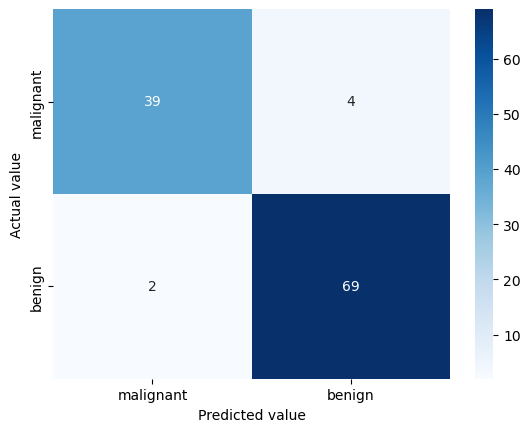

Wall time: 202 ms


In [79]:
%%time
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

labels = data.target_names
k = len(labels)

def create_new_features(X):
    X.shape
    mean_radius_idx = 0  # the index of 'mean radius'
    mean_diameter = X[:, mean_radius_idx] * 2
    X = np.column_stack((X, mean_diameter))
    mean_symmetry_idx = 8
    worst_symmetry_idx = 28
    symmetry_difference = X[:, worst_symmetry_idx] - X[:, mean_symmetry_idx]
    X = np.column_stack((X, symmetry_difference))
    return X

# Define the transformers for numeric features
numeric_features = [i for i, dtype in enumerate(data.feature_names)]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler()), ('binning', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'))]
)

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features)
    ]
)

# Create SelectKBest instances for different measures
kbest_chi2 = SelectKBest(score_func=chi2, k=10)
kbest_mi = SelectKBest(score_func=mutual_info_classif, k=10)
kbest_f_classif = SelectKBest(score_func=f_classif, k=10)

# Create a FeatureUnion of the SelectKBest instances
feature_union = FeatureUnion([
    ('kbest_chi2', kbest_chi2),
    ('kbest_mi', kbest_mi),
    ('kbest_f_classif', kbest_f_classif)
])

# Create a pipeline with feature selection, feature engineering, preprocessing, and classifier
pipeline = Pipeline([
    ('feature_engineering', FunctionTransformer(create_new_features)),
    ('preprocessor', preprocessor),
    ('feature_selection', feature_union),
    ('classifier', SVC())
])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Model accuracy: %.3f" % pipeline.score(X_test, y_test))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()
